In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm

import os
import scipy.interpolate
#from adaptivemultidimsampler.sampler2D import AdaptiveSampler2D


SyntaxError: invalid syntax (3627335567.py, line 8)

In [11]:
from adaptive_sampling import Triangle, Interval2D, AdaptiveSampler2D
points = np.array([[0., 0.], [1, 0.], [0, 1]])
t = Triangle(points[:,0], points[:,1])
#mid_points =t.mid_points()
#center = t.central_point()
#points = np.vstack([points, mid_points, center])
print(points.shape)
f = 0.5*points[:, 0]**2 + 0.5*points[:, 1]**2 + 0.5
interval = Interval2D.from_outer_triangle(points[:,0], points[:,1], f)
print(interval)

(3, 2)
((0.0,0.0,0.5), (1.0,0.0,1.0), (0.0,1.0,1.0), (0.5,0.0,nan), (0.5,0.5,nan), (0.0,0.5,nan), (0.3333333333333333,0.3333333333333333,nan))


In [393]:
def test_func(x, y):
    return 0.5*x**2 + 0.5*y**2 + 0.5

test_function1 = lambda x, y: test_function(x, y, 250.)

width_range = [120, 230]
wvl_range = [600, 780]


adapt = AdaptiveSampler2D(test_function1, wvl_range[0], wvl_range[1],
                          width_range[0], width_range[1], max_func = 3000, n_parallel=19)
adapt.init_intervals()
#adapt.refine_intervals()
#print(adapt.errors)
#print(adapt.n_evaluations)

/tmp/ipykernel_31587/4169766192.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, is_inside)


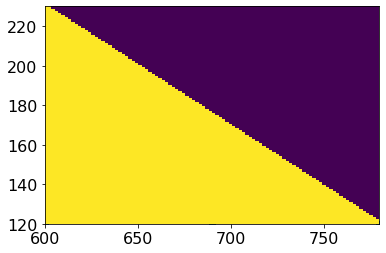

In [403]:
wavelengths = np.linspace(wvl_range[0], wvl_range[1], 101)
widths = np.linspace(width_range[0], width_range[1], 101)

X, Y = np.meshgrid(wavelengths, widths, indexing='ij')

interval0 = adapt.intervals[0]
plt.scatter(interval0.x, interval0.y)
is_inside = np.zeros(X.shape)
for ii in range(X.shape[0]):
    for jj in range(X.shape[1]):
        point = np.array([X[ii,jj], Y[ii, jj]])
        is_inside[ii, jj] = interval0.contains(point)
plt.pcolormesh(X, Y, is_inside)

In [348]:
np.sort(np.array(list(adapt.global_hash_map.values())))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94])

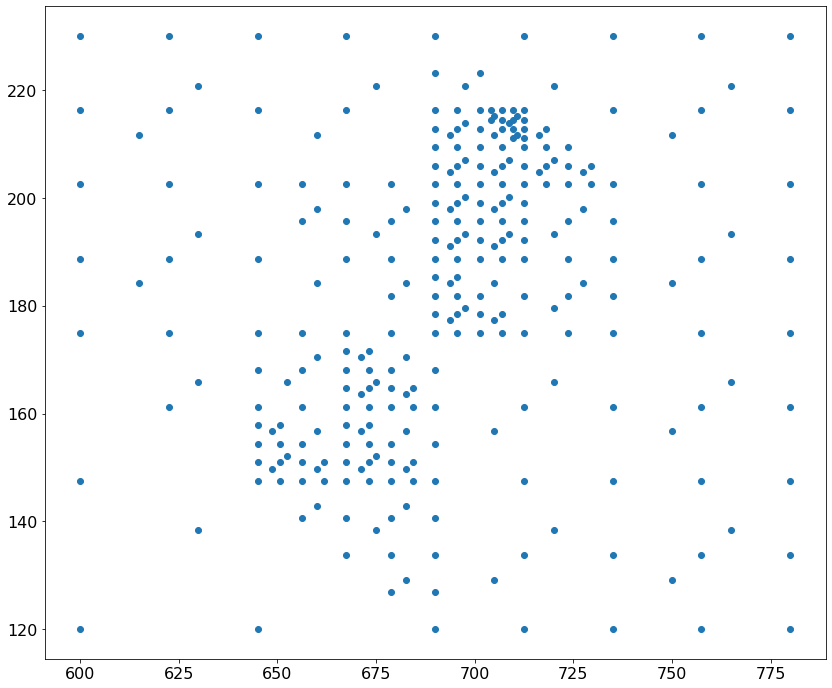

In [377]:
plt.figure(figsize=(14,12))
plt.scatter(adapt.point_array[:,0], adapt.point_array[:,1])

2993


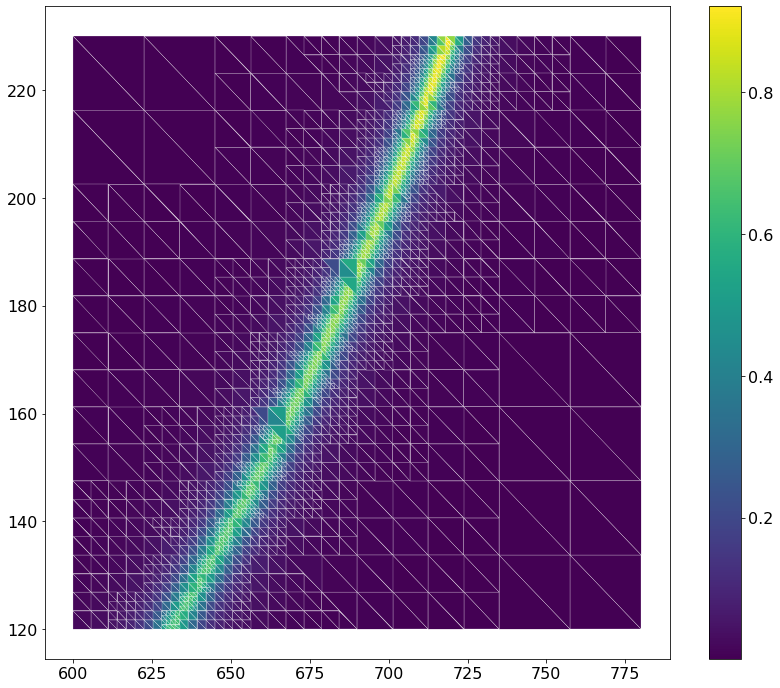

In [379]:
grid, f_vals, triangles = adapt.get_grid(grid_type='six_point')
print(len(adapt._all_hashed_vals))
#print(grid)
#print(f_vals)
#print(triangles)
#print(triangles.shape)
#plt.scatter(grid[:,0], grid[:,1], c=f_vals)
#triangulation = scipy.spatial.Delaunay(grid)
plt.figure(figsize=(14,12))
plt.tripcolor(grid[:,0], grid[:,1], f_vals, triangles=triangles, shading = 'flat', edgecolor='w')
#plt.tripcolor(grid[:,0], grid[:,1], f_vals, triangles=triangles, shading = 'gouraud', edgecolor='w')
#plt.scatter(grid[:,0], grid[:,1], c='k')
plt.colorbar()

In [107]:
for interval in adapt.intervals:
    print(interval.estimate_error())

0.0013020833333333426
0.0013020833333333148
0.0013020833333333148
0.0013020833333333148
0.0013020833333333148
0.0013020833333333287
0.0013020833333333426
0.0013020833333333426


In [169]:
def lorentzian(x, x0, gamma, a):
    return a*(0.5*gamma)/( (x-x0)**2 + (0.5*gamma)**2)

def lorentzian_peak_val(gamma, a):
    return a*0.5*gamma/(0.5*gamma)**2

def lorentzian_a_factor(gamma, peak_val):
    return (2*peak_val/gamma)*(0.5*gamma)**2

def test_function(wavelength, width, height):
    peak_pos = peak_pos_function(width, height)
    peak_int = peak_intensity_function(width, height)
    width = peak_width_function(width, height)
    return lorentzian(wavelength, peak_pos, width, peak_int)
    
def peak_pos_function(width, height):
    m1 = 1.5 + 1e-2*(height-250)
    m2 = -2e-3 - 1e-5*(height-250)
    #1e-2*(height-250)
    return 1.5*(250-height)+480 + m1*width + m2*width**2

def peak_width_function(width, height):
    m1 = -3e-2 
    m2 = 0.
    return 10 + m1*(width-140) - m2*(width-120)**2


def peak_intensity_function(width, height):
    m1 = 1e-8 -  1e-9*(height-250)
    m2 = 1e-5 
    return 3.5 + m1* (width-180) + m2*(width-160+(height-250))**2
    
    

Text(0, 0.5, 'Width (nm)')

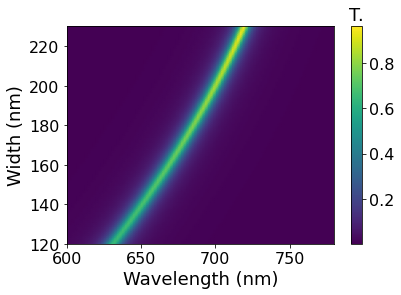

In [170]:
def test_function2(wavelength, width):
    height = 250
    peak_pos = peak_pos_function(width, height)+30
    peak_int = peak_intensity_function(width, height)
    peak_width = peak_width_function(width, height)
    l1 = lorentzian(wavelength, peak_pos, peak_width, peak_int)
    #print(np.unique(peak_pos))
    peak_pos2 = peak_pos_function(width, height+100)-100
    peak_int2 = peak_intensity_function(width, height)
    peak_width2 = peak_width_function(width, height)
    #print(np.unique(peak_pos2))
    l2 = lorentzian(wavelength, peak_pos2, peak_width2, peak_int2)
    return l1 + l2

def test_function3(wavelength, width):
    height = 250
    peak_pos = peak_pos_function(width, height)+30
    peak_int = peak_intensity_function(width, height)
    peak_width = peak_width_function(width, height)
    l1 = lorentzian(wavelength, peak_pos, peak_width, peak_int)
    #print(np.unique(peak_pos))
    peak_pos2 = peak_pos_function(width, height+100)-100
    peak_int2 = peak_intensity_function(width, height)
    peak_width2 = peak_width_function(width, height)
    #print(np.unique(peak_pos2))
    l2 = lorentzian(wavelength, peak_pos2, peak_width2, peak_int2)
    
    peak_pos3 = peak_pos_function(width, height+50)+120
    peak_int3 = peak_intensity_function(width, height)
    peak_width3 = peak_width_function(width, height)
    #print(np.unique(peak_width3), np.unique(peak_width2), np.unique(peak_width))
    l3 = lorentzian(wavelength, peak_pos3, peak_width3, peak_int3)
    return l1 + l2 + l3

test_function1 = lambda x, y: test_function(x, y, 250.)

width_range = [120, 230]
wvl_range = [600, 780]
wavelengths = np.linspace(wvl_range[0], wvl_range[1], 101)
widths = np.linspace(width_range[0], width_range[1], 101)

X, Y = np.meshgrid(wavelengths, widths)

Z = test_function1(X, Y)
plt.figure()
plt.pcolormesh(X,Y,Z, shading='gouraud')
cb = plt.colorbar()
cb.ax.set_title("T.")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Width (nm)")
#plt.savefig(os.path.join("figures", "goal_function1.png"), dpi=300, bbox_inches='tight')

(3, 2)


[autoreload of adaptive_sampling failed: Traceback (most recent call last):
  File "/scratch/htc/bzfmanle/Python/miniconda3/envs/htc_env/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/scratch/htc/bzfmanle/Python/miniconda3/envs/htc_env/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/scratch/htc/bzfmanle/Python/miniconda3/envs/htc_env/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/scratch/htc/bzfmanle/Python/miniconda3/envs/htc_env/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/data/numerik/people/bzfmanle/JCMwave/Simulat

AttributeError: type object 'Interval2D' has no attribute 'from_outer_triangle'

In [26]:
interval = Interval2D(points[:,0], points[:,1], f)
print(interval.estimate_three_point())
print(interval.estimate_seven_point())
print(interval.estimate_error())

0.35416666666666663
0.33333333333333337
0.02083333333333326


init_params: [0.0, 723.038596, 1.7821782178217822, 0.8210853150963024]
relx_params: [1.00000000e-10 7.22801226e+02 8.66076996e+00 3.56878115e+00]


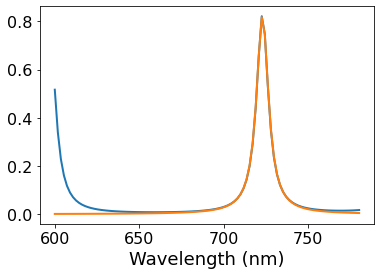

In [20]:
width_range = [120, 230]
wvl_range = [600, 780]
wavelengths = np.linspace(wvl_range[0], wvl_range[1], 101)
widths = np.linspace(width_range[0], width_range[1], 101)

X, Y = np.meshgrid(wavelengths, widths)

Z = test_function3(wavelengths, 190.)
plt.figure()
plt.plot(wavelengths, Z)
plt.xlabel("Wavelength (nm)")

params = relax_multi_lorentz(wavelengths, Z, 1, [7.23038596e+02])
print("relx_params: {}".format(params))
plt.plot(wavelengths, multi_lorentz_plus_const(wavelengths, *params))

#plt.ylabel("Width (nm)")
#plt.savefig(os.path.join("figures", "goal_function1.png"), dpi=300, bbox_inches='tight')

seed positions: [array(711.25121936)]
seed positions: [array(728.61626631)]
seed positions: [array(734.79792734), array(606.073211)]
seed positions: [array(749.19806478), array(648.57699376)]
seed positions: [array(703.05164751)]
seed positions: [array(676.05383071)]
seed positions: [array(666.24868848), array(749.43729145)]
seed positions: [array(661.19800539), array(729.18707712)]
33
35
43
45
29
41
37
31
total points: 323, per layer: 35.888888888888886


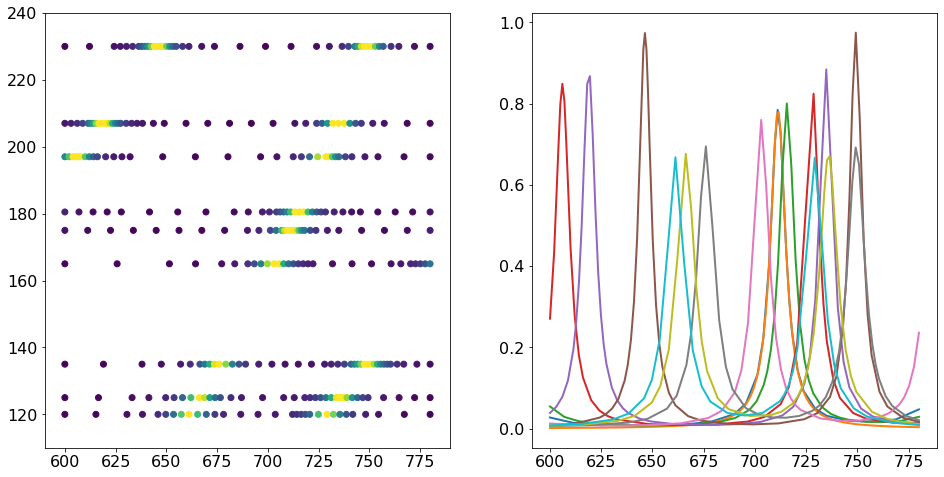

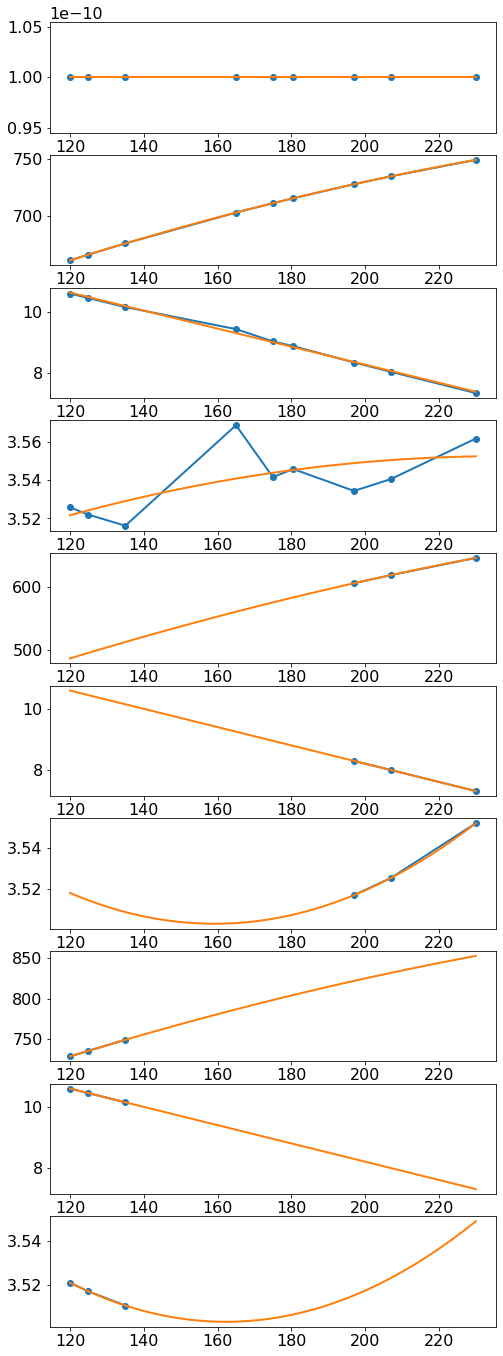

In [5]:
width_range = [120, 230]
wvl_range = [600, 780]

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

plt.sca(ax[0])
rough_wavelengths = np.linspace(wvl_range[0], wvl_range[1], 8)
rough_widths = np.linspace(width_range[0], width_range[1], 8)
X, Y = np.meshgrid(rough_wavelengths, rough_widths)

test_function1 = lambda x, y: test_function(x, y, 250.)

function = lambda x, y: test_function3(x, y)

keys = {}
keys['function_error_tolerance'] = 5e-2
keys['max_function_calls'] = 51
keys['Multiplicity'] = 3
keys['peak_prominence'] = 0.1

rf = ResonanceFinder(function, keys, wvl_range, width_range)
plt.xlim([wvl_range[0]-10, wvl_range[1]+10])
plt.ylim([width_range[0]-10, width_range[1]+10])
plt.sca(ax[1])
n_total_points = 0
n_layers = 0
x, y, f, n_peaks, params = rf.find_intial_resonances()
n_total_points += x.size
n_layers += 1
plt.sca(ax[1])
plt.plot(x, f)

plt.sca(ax[0])
plt.scatter(x, y, c=f, vmin=0., vmax=0.6)

plt.sca(ax[1])
fine_x = np.linspace(wvl_range[0], wvl_range[1], 201)

plt.plot(fine_x, multi_lorentz_plus_const(fine_x, *params))
rf.keys['max_function_calls'] = 51
x_val_set, y_val_set, f_val_set = rf.fit_resonances()
for ii, x_vals in enumerate(x_val_set):
    plt.sca(ax[0])
    y_vals = y_val_set[ii]
    f_vals = f_val_set[ii]    
    n_total_points += x_vals.size
    print(x_vals.size)
    n_layers += 1
    plt.scatter(x_vals, y_vals, c=f_vals, vmin=0., vmax=0.6)
    plt.sca(ax[1])
    plt.plot(x_vals, f_vals)

fig, axes = plt.subplots(10,1, figsize=(8, 24))
model_keys = list(rf.models.keys())
fine_widths = np.linspace(width_range[0], width_range[1], 101)
for ix in range(len(rf.models)):
    if ix == 0:
        plt.sca(axes[ix])
        model = rf.models[model_keys[ix]]
        plt.plot(model.x, model.y, marker='o')
        plt.plot(fine_widths, model.evaluate(fine_widths))
    else:
        model = rf.models[model_keys[ix]]
        submodel_keys = list(model.keys())
        for ip in range(3):
            plt.sca(axes[(ix-1)*3+ip+1])
            submodel = model[submodel_keys[ip]]
            plt.plot(submodel.x, submodel.y, marker='o')
            plt.plot(fine_widths, submodel.evaluate(fine_widths))
            
    
print("total points: {}, per layer: {}".format(n_total_points, n_total_points/n_layers))

init_params: [0.0, 712.5, 6.786329564606147, 2.4733899851763184]
init_params: [0.0, 715.5532811697792, 8.660730841123044, 3.466612319748662]
init_params: [0.0, 724.2580697509468, 8.354956346230345, 3.45566198845757]
init_params: [0.0, 626.0911815314719, 11.823615534364903, 5.082570418259271, 739.1529681678502, 8.673990824231542, 3.9361722669813064]
init_params: [0.0, 634.2268742544024, 5.725245475750702, 2.5904535053926057, 742.5801244646342, 8.850926171749325, 4.111355614688993]
init_params: [0.0, 646.8446307989439, 5.63187737347775, 2.6827223487038636, 749.2022109700378, 8.05332861108154, 3.9250192080438313]
init_params: [0.0, 692.6906535058621, 9.385921248394498, 3.4346968199587775, 771.8147487661746, 6.441567863695156, 2.312214480300103]
init_params: [0.0, 687.7362315680773, 9.547312053628028, 3.4368492946580127, 765.8569537263395, 7.167707977807623, 2.5721632205196547]
init_params: [0.0, 677.4817172724621, 9.825143188947724, 3.427584195078611, 751.8732803098729, 9.067082079920002,

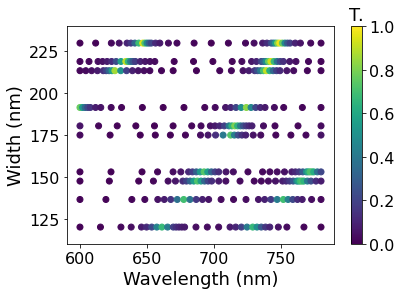

In [21]:
width_range = [120, 230]
wvl_range = [600, 780]

#fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig = plt.figure()
gs = gridspec.GridSpec(1, 1, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])

plt.sca(ax0)

#n_side = int(np.sqrt(340))
n_side = 51
n_total_points = 0
avg_wvl_vals = []
n_layers = 0
#rough_wavelengths = np.linspace(wvl_range[0], wvl_range[1], n_side)
#rough_widths = np.linspace(width_range[0], width_range[1], n_side)
#wvlx = np.diff(rough_wavelengths)[0]
#widthsx = np.diff(rough_widths)[0]
#n_points_total = 0
test_function1 = lambda x, y: test_function(x, y, 250.)

function = lambda x, y: test_function3(x, y)

keys = {}
keys['function_error_tolerance'] = 1e-1
keys['max_function_calls'] = n_side
keys['Multiplicity'] = 3
keys['peak_prominence'] = 0.1

rf = ResonanceFinder(function, keys, wvl_range, width_range)
#rf.mode = 'uniform'
#rf.param_step_manager.mode = 'uniform'
#rf.param_step_manager.step_size = widthsx
#rf.step_size = widthsx

plt.xlim([wvl_range[0]-10, wvl_range[1]+10])
plt.ylim([width_range[0]-10, width_range[1]+10])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Width (nm)")
x, y, f, n_peaks, params = rf.find_intial_resonances()

n_total_points += x.size
n_layers += 1
avg_wvl_vals.append(x.size)
plt.sca(ax0)
plt.scatter(x, y, c=f, vmin=0., vmax=1.0)

rf.keys['max_function_calls'] = n_side
x_val_set, y_val_set, f_val_set = rf.fit_resonances()
#print("step size: {}".format(rf.param_step_manager.step_size))

for ii, x_vals in enumerate(x_val_set):
    plt.sca(ax0)
    y_vals = y_val_set[ii]
    f_vals = f_val_set[ii]    
    n_total_points += x_vals.size    
    n_layers += 1
    print(x_vals.size)
    avg_wvl_vals.append(x_vals.size)
    plt.scatter(x_vals, y_vals, c=f_vals, vmin=0., vmax=1.0)    

model_keys = list(rf.models.keys())
fine_widths = np.linspace(width_range[0], width_range[1], 101)
cb = plt.colorbar()
cb.ax.set_title("T.")
print("n_total_points: {}".format(n_total_points))
print("n_total_layer: {}".format(n_layers))
avg_wvl_size = int(np.mean(np.array(avg_wvl_vals)))
print("average wvl range size: {}".format(avg_wvl_size))
print("equivalent wvl spacing: {}".format(np.diff(np.linspace(wvl_range[0], wvl_range[1], avg_wvl_size))[0]))
print("equivalent width spacing: {}".format(np.diff(np.linspace(width_range[0], width_range[1],
                                                                n_layers))[0]))


#axes = []
#plt.savefig(os.path.join("figures", "adaptive_function1.png"), dpi=300, bbox_inches='tight')

3
4
5
6
7
8
9
10
11
total points: 308, per layer: 30.8


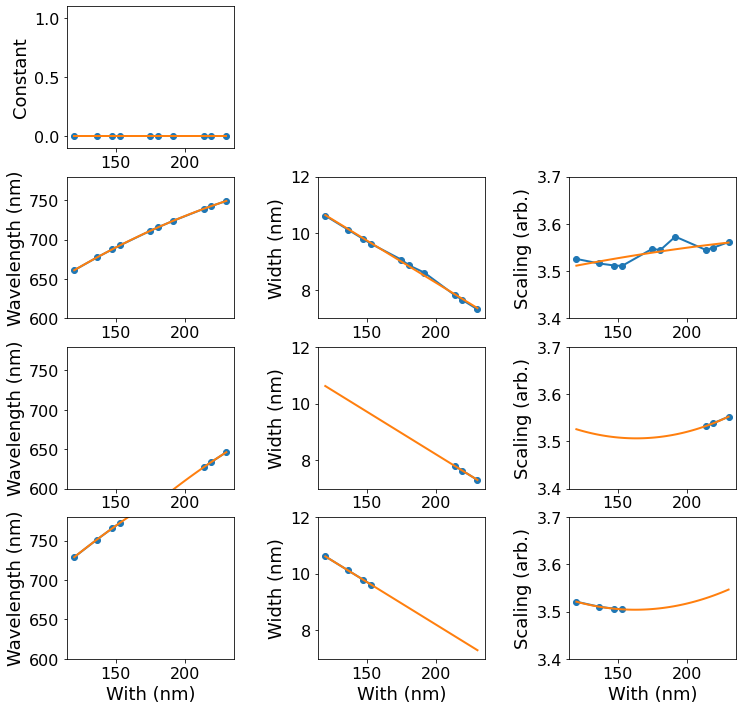

In [22]:
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(4, 3, figure=fig, wspace=0.5)

#ax0 = fig.add_subplot(gs[0, 0])

for ix in range(len(rf.models)):
    if ix == 0:
        axes_index = np.unravel_index(ix, (4, 3), order='C')
        ax = fig.add_subplot(gs[axes_index])
        #axes.append(ax)
        plt.sca(ax)
        model = rf.models[model_keys[ix]]
        plt.plot(model.x, model.y, marker='o')
        plt.plot(fine_widths, model.evaluate(fine_widths))
        plt.ylim([-0.1, 1.1])
        plt.ylabel("Constant")        
    else:
        model = rf.models[model_keys[ix]]
        submodel_keys = list(model.keys())
        for ip in range(3):
            flat_index = (ix-1)*3+ip+3
            print(flat_index)
            axes_index = np.unravel_index(flat_index, (4, 3), order='C')
            ax = fig.add_subplot(gs[axes_index])
            #axes.append(ax)
            plt.sca(ax)
            submodel = model[submodel_keys[ip]]
            plt.plot(submodel.x, submodel.y, marker='o')
            plt.plot(fine_widths, submodel.evaluate(fine_widths))
            
            if submodel_keys[ip] == 'peak_pos':
                plt.ylim((600, 780))                
                plt.ylabel("Wavelength (nm)")
            elif submodel_keys[ip] == 'gamma':
                plt.ylim([7., 12.])
                plt.ylabel("Width (nm)")
            elif submodel_keys[ip] == 'a':
                plt.ylim([3.4, 3.7])
                plt.ylabel("Scaling (arb.)")        
            if axes_index[0] == 3:
                plt.xlabel("With (nm)")
    
print("total points: {}, per layer: {}".format(n_total_points, n_total_points/n_layers))
#plt.savefig(os.path.join("figures", "adaptive_function3_models.png"), dpi=300, bbox_inches='tight')

In [431]:
np.arange(width_range[0], width_range[1]+widthsx, widthsx).size

51

total points: 420, per layer: 0.7433628318584071


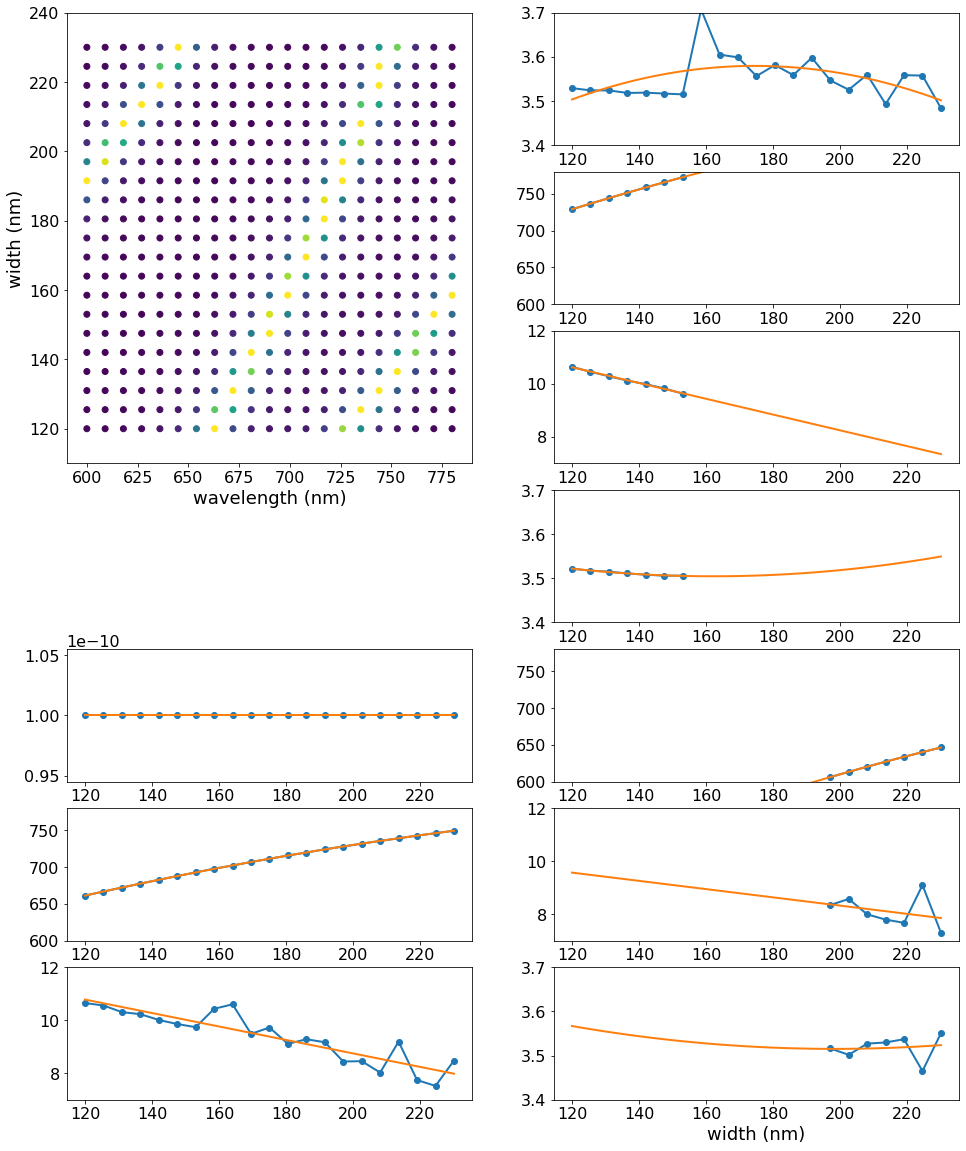

In [448]:
width_range = [120, 230]
wvl_range = [600, 780]

#fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig = plt.figure(figsize=(16, 20))
gs = gridspec.GridSpec(7, 2, figure=fig)

ax0 = fig.add_subplot(gs[:3, 0])

plt.sca(ax0)

#n_side = int(np.sqrt(340))
n_side = 21
n_total_points = 0
rough_wavelengths = np.linspace(wvl_range[0], wvl_range[1], n_side)
rough_widths = np.linspace(width_range[0], width_range[1], n_side)
wvlx = np.diff(rough_wavelengths)[0]
widthsx = np.diff(rough_widths)[0]

test_function1 = lambda x, y: test_function(x, y, 250.)

function = lambda x, y: test_function3(x, y)

keys = {}
keys['function_error_tolerance'] = 5e-2
keys['max_function_calls'] = n_side
keys['Multiplicity'] = 3
keys['peak_prominence'] = 0.1

rf = ResonanceFinder(function, keys, wvl_range, width_range)
rf.mode = 'uniform'
rf.param_step_manager.mode = 'uniform'
rf.param_step_manager.step_size = widthsx
#rf.step_size = widthsx

plt.xlim([wvl_range[0]-10, wvl_range[1]+10])
plt.ylim([width_range[0]-10, width_range[1]+10])
plt.xlabel("wavelength (nm)")
plt.ylabel("width (nm)")
x, y, f, n_peaks, params = rf.find_intial_resonances()

plt.sca(ax0)
plt.scatter(x, y, c=f, vmin=0., vmax=0.6)

rf.keys['max_function_calls'] = n_side
x_val_set, y_val_set, f_val_set = rf.fit_resonances()
#print("step size: {}".format(rf.param_step_manager.step_size))

for ii, x_vals in enumerate(x_val_set):
    plt.sca(ax0)
    y_vals = y_val_set[ii]
    f_vals = f_val_set[ii]    
    n_total_points += x_vals.size    
    n_layers += 1
    plt.scatter(x_vals, y_vals, c=f_vals, vmin=0., vmax=0.6)    

model_keys = list(rf.models.keys())
fine_widths = np.linspace(width_range[0], width_range[1], 101)
#axes = []

for ix in range(len(rf.models)):
    if ix == 0:
        axes_index = np.unravel_index(ix+4, (7, 2), order='F')
        ax = fig.add_subplot(gs[axes_index])
        #axes.append(ax)
        plt.sca(ax)
        model = rf.models[model_keys[ix]]
        plt.plot(model.x, model.y, marker='o')
        plt.plot(fine_widths, model.evaluate(fine_widths))
    else:
        model = rf.models[model_keys[ix]]
        submodel_keys = list(model.keys())
        for ip in range(3):
            flat_index = (ix-1)*3+ip+1
            axes_index = np.unravel_index(flat_index+4, (7, 2), order='F')
            ax = fig.add_subplot(gs[axes_index])
            #axes.append(ax)
            plt.sca(ax)
            submodel = model[submodel_keys[ip]]
            plt.plot(submodel.x, submodel.y, marker='o')
            plt.plot(fine_widths, submodel.evaluate(fine_widths))
            
            if submodel_keys[ip] == 'peak_pos':
                plt.ylim((600, 780))
            elif submodel_keys[ip] == 'gamma':
                plt.ylim([7., 12.])
            elif submodel_keys[ip] == 'a':
                plt.ylim([3.4, 3.7])
            
            
    plt.xlabel("width (nm)")        
    
print("total points: {}, per layer: {}".format(n_total_points, n_total_points/n_layers))
plt.savefig(os.path.join("figures", "uniform_21x21_function3.png"), dpi=300, bbox_inches='tight')

In [428]:
51*51

2601

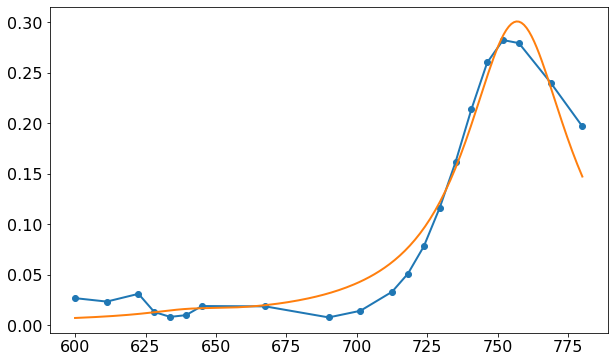

In [153]:
df = pd.read_csv("results/wavelength_scan_test.csv")
df = df[df.Polarization=='S']
df.sort_values(by='vacuum_wavelength', inplace=True)
wvls = df.loc[:, 'vacuum_wavelength'].values*1e9
T = df.loc[:, 'T'].values

indices = np.where(wvls < 1000.)
wvls = wvls[indices]
T = T[indices]
fig = plt.figure(figsize=(10,6))

plt.plot(wvls, T, marker='o')
keys['peak_prominence'] = 0.01
rf = ResonanceFinder(function, keys, wvl_range, width_range)
n_peaks, params = rf.fit_model(wvls, T)
#print("params: {}".format(params))
#params[2] = 11.61639325934797
#params[3] = 1.470404069115203
fine_x = np.linspace(wvl_range[0], wvl_range[1], 201)
plt.plot(fine_x, multi_lorentz_plus_const(fine_x, *params))


In [219]:
x = [120.0, 137.5, 162.5, 175.0, 177.2, 181.6, 190.4, 208.0, 230.0]
#y = [5.545654334963406, 5.655366778777557, 5.728793524089594, 5.811589755032743, 5.773732307400674, 5.77319531718002, 5.877132158194082, 5.698738850035986, 5.760915999436718]

y = [9.426760683196489e-35, 5.9722234961380675e-37, 5.380097960231527e-40, 5.866899765694731e-38, 3.3385566065149404e-42, 7.806532776499963e-40, 9.905760016032491e-39, 8.633308045849624e-48, 3.553484613863783e-39]

order = 3
params = np.polyfit(x, y, order)
print(params)

[-4.41414507e-40  2.47150347e-37 -4.54385383e-35  2.74250064e-33]


In [413]:
print(np.unravel_index(5, (6, 2), order='C'))
print(np.unravel_index(5, (6, 2), order='F'))

(2, 1)
(5, 0)


In [21]:
a = np.linspace(0, 20, 41)
print(a)
print()

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20. ]


Text(0, 0.5, 'Width (nm)')

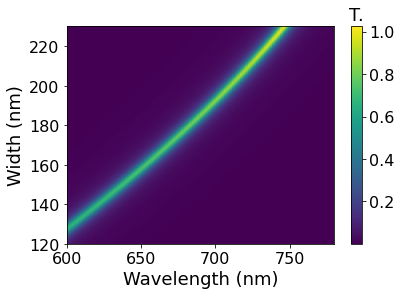

In [173]:
width_range = [120, 230]
wvl_range = [600, 780]
wavelengths = np.linspace(wvl_range[0], wvl_range[1], 101)
widths = np.linspace(width_range[0], width_range[1], 101)

X, Y = np.meshgrid(wavelengths, widths)

Z = test_function2(X, Y)
plt.figure()
plt.pcolormesh(X,Y,Z, shading='gouraud')
cb = plt.colorbar()
cb.ax.set_title("T.")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Width (nm)")

#plt.savefig(os.path.join("figures", "original_function.png"), dpi=300, bbox_inches='tight')


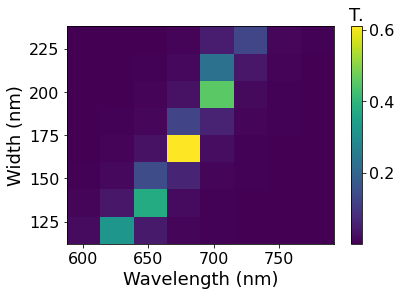

In [516]:
width_range = [120, 230]
wvl_range = [600, 780]
rough_wavelengths = np.linspace(wvl_range[0], wvl_range[1], 8)
rough_widths = np.linspace(width_range[0], width_range[1], 8)

X, Y = np.meshgrid(rough_wavelengths, rough_widths)

Z = test_function(X, Y, 250)

plt.pcolormesh(X,Y,Z, shading='nearest')
cb = plt.colorbar()
cb.ax.set_title("T.")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Width (nm)")

plt.savefig(os.path.join("figures", "rough_scan.png"), dpi=300, bbox_inches='tight')

In [200]:
print(1240./1000.)
print(1240./500.)

1.24
2.48


In [397]:
class Interval():

    def __init__(self, x, y):
        """
        evaluate the trapz and simpsons error on an equally spaced three
        point interval.

        x, np.array(3,) float:
          the x positions
        y, np.array(3,) float:
          the evaluated function        
        """
        self.x = x
        self.y = y

    def estimate_trapz(self):
        a = self.x[0]
        b = self.x[2]
        fa = self.y[0]
        fb = self.y[2]
        f_mid = self.y[1]
        return (b-a)/2. *(0.5*(fa+fb) + f_mid)

    def estimate_simps(self):
        a = self.x[0]
        b = self.x[2]
        fa = self.y[0]
        fb = self.y[2]
        f_mid = self.y[1]
        return (b-a)/6. * (fa+4.*f_mid+fb)

    def estimate_error(self):
        return  np.abs(self.estimate_trapz()-self.estimate_simps())

    def split(self):
        mid1 = 0.5*(self.x[0]+self.x[1])
        new_x1 = np.array([self.x[0], mid1, self.x[1]])
        new_y1 = np.array([self.y[0], np.nan, self.y[1]])
                          
        mid2 = 0.5*(self.x[1]+self.x[2])
        new_x2 = np.array([self.x[1], mid2, self.x[2]])
        new_y2 = np.array([self.y[1], np.nan, self.y[2]])
        return [Interval(new_x1, new_y1), Interval(new_x2, new_y2)]

    def contains_nan(self):
        return np.any(np.isnan(self.y))
    
    def __repr__(self):
        return "(({},{}), ({},{}), ({},{}))".format(self.x[0], self.y[0], self.x[1], 
                                                    self.y[1], self.x[2], self.y[2])

class AdaptiveSampler():

    def __init__(self, function, x_min, x_max, tol=1e-3, max_func=100):
        self.function = function
        self.x_min = x_min
        self.x_max = x_max
        self.x_range = x_max-x_min
        self.tol = tol
        self.max_func = max_func
        self.init_intervals()
        self.refine_intervals()
        

    def init_intervals(self):        
        x_init = np.array([self.x_min, 0.5*(self.x_min+self.x_max),
                           self.x_max])
        y_init = self.function(x_init)
        #print(x_init)
        #print(y_init)
        self.intervals = [Interval(x_init, y_init)]        
        self.errors = [self.intervals[0].estimate_error()]

    def evaluate_function(self, x):
        return self.function(x)

    def refine_intervals(self):
        n_parallel = 1
        step = 0
        while step < self.max_func:
            #print(step, self.max_func)
            error_array = np.array(self.errors)            
            sort_args = np.argsort(error_array)[::-1]
            #print(sort_args)
            self.intervals = np.array(self.intervals)[sort_args].tolist()
            #print("n intervals: {}".format(len(self.intervals)))
            #for interval in self.intervals:
            #    print(interval)            
            #to_refine = self.intervals([:n_parallel])
            max_parallel = np.min([len(self.intervals), n_parallel])
            to_evaluate = []
            #print("max parallel: {}".format(max_parallel))
            for i in range(max_parallel):
                #print("before extend:")
                #print(self.intervals)
                interval = self.intervals.pop(0)
                new_intervals = interval.split()                
                self.intervals.extend(new_intervals)
                #print("after extend:")
                #print(self.intervals)
                to_evaluate.append(new_intervals[0].x[1])
                to_evaluate.append(new_intervals[1].x[1])
                
            y_vals = self.evaluate_function(np.array(to_evaluate))
            ii = 0
            for interval in self.intervals:
                if interval.contains_nan():
                    interval.y[1] = y_vals[ii]
                    ii += 1
            #print("after new evals:")
            #print(self.intervals)
            errors = np.zeros(len(self.intervals))
            for i_int, interval in enumerate(self.intervals):
                errors[i_int] = interval.estimate_error()
            self.errors = errors
            step += 1
            if np.max(errors) < self.tol:
                break
                    
    def get_grid(self):
        left = np.zeros(len(self.intervals))
        for ii, interval in enumerate(self.intervals):
            left[ii] = interval.x[0]
        sort_indices = np.argsort(left)        
        self.intervals = np.array(self.intervals)[sort_indices].tolist()
        grid = np.zeros(len(self.intervals)*2+1)
        f_vals = np.zeros(len(self.intervals)*2+1)
        i_grid = 0
        for i_int in range(len(self.intervals)):
            interval = self.intervals[i_int]
            grid[i_grid] = interval.x[0]
            grid[i_grid+1] = interval.x[1]
            
            f_vals[i_grid] = interval.y[0]
            f_vals[i_grid+1] = interval.y[1]
            
            i_grid += 2
        # last point is not shared with another interval so add as a special case
        grid[i_grid] = interval.x[2]
        f_vals[i_grid] = interval.y[2]
        return grid, f_vals
    
                    

n_intial_points: 17
seed positions: [605.0, 675.0, 780.0]
i_seed: 0, current_left: 600.0, current_right: 605.0
n_points fraction: 0.4722222222222222
n_points: 3
i_seed: 1, current_left: 605.0, current_right: 675.0
n_points fraction: 6.611111111111112
n_points: 7
i_seed: 2, current_left: 675.0, current_right: 780.0
n_points fraction: 9.916666666666668
n_points: 9
n_intial_points: 17
x_init: [600.         602.5        605.         616.66666667 628.33333333
 640.         651.66666667 663.33333333 675.         688.125
 701.25       714.375      727.5        740.625      753.75
 766.875      780.        ]
[600.         602.5        605.         616.66666667 628.33333333
 640.         651.66666667 663.33333333 675.         688.125
 701.25       714.375      727.5        740.625      753.75
 766.875      780.        ]


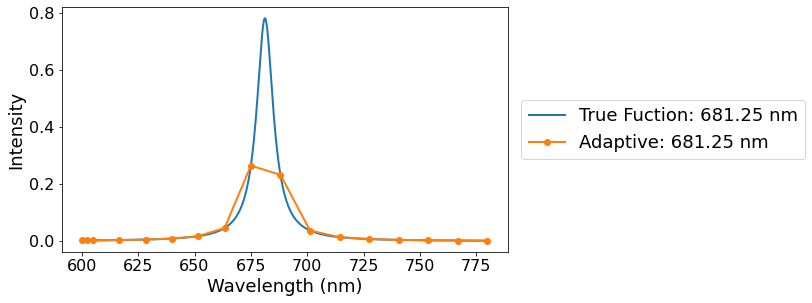

In [363]:
height = 250
width = 175
sliced_test_function = lambda x: test_function(x, width, height)
fig = plt.figure(figsize=(8,4.5))
step = 0.1
from adaptive_sampling import AdaptiveSampler
from resonance_interpolation import fit_lorentzian
#print(peak_pos_function(175.))
wavelengths = np.arange(600, 780+step, step)

z = sliced_test_function(wavelengths)
plt.plot(wavelengths, z, label ='True Fuction: 681.25 nm')

adaptive = AdaptiveSampler(sliced_test_function, 600., 780., tol=2e-2, max_func=21, n_parallel =21)
adaptive.init_intervals(seed_positions=[605., 675.])
grid, f_vals = adaptive.get_grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
print(grid)
lorentzian_estimate1 = fit_lorentzian(grid, f_vals)[0][0]
grid_plot = plt.plot(grid, f_vals, marker='o', label ='Adaptive: {} nm'.format(lorentzian_estimate1))[0]
#equidistant_x = np.linspace(600, 780, grid.size)
#equidistant_y = sliced_test_function(equidistant_x)
#lorentzian_estimate2 = fit_lorentzian(equidistant_x, equidistant_y)[0][0]
#equi_plot = plt.plot(equidistant_x, equidistant_y, marker='x',
#                     label='Adaptive: {} nm'.format(lorentzian_estimate2))[0]
plt.legend(fontsize=18., bbox_to_anchor=[1.01, 0.5], loc='center left')

#for max_func_val in [6]:
if False:
    print(max_func_val)
    adaptive = AdaptiveSampler(sliced_test_function, 600., 780., tol=1e-3, max_func=max_func_val)
    adaptive.init_intervals()
    grid, f_vals = adaptive.get_grid()
    grid_plot.set_xdata(grid)
    grid_plot.set_ydata(f_vals)
    print(grid.size)

    equidistant_x = np.linspace(600, 780, grid.size)
    equidistant_y = sliced_test_function(equidistant_x)
    equi_plot.set_xdata(equidistant_x)
    equi_plot.set_ydata(equidistant_y)


    #plt.savefig(os.path.join("figures","adaptive_sampling_{}.png".format(max_func_val)),
    #            dpi=300, bbox_inches='tight')


In [336]:
adaptive.intervals

[((600.0,0.002366889669122994), (636.0,0.00758012117439976), (672.0,0.14843116615859975)),
 ((672.0,0.14843116615859975), (708.0,0.021306173922057265), (744.0,0.0039601312797677745))]

In [403]:

    

def fit_lorentzian(x, y):
    x0 = x[np.where(np.isclose(y, np.max(y)))][0]
    a = np.max(y)
    gamma = 5
    #print(x0, a, gamma)
    parameters = scipy.optimize.curve_fit(lorentzian, x, y, p0=[x0, gamma, a])
    return parameters
    
def find_resonance_wavelength(width, wvl_min, wvl_max, height):
    sliced_test_function = lambda x: test_function(x, width, height)
    adaptive = AdaptiveSampler(sliced_test_function, wvl_min, wvl_max, tol=1e-1)
    x, y = adaptive.get_grid()
    #plt.scatter(x, y)    
    params = fit_lorentzian(x, y)
    #res_wvl = params[0][0]
    #print(res_wvl, x.size)
    return adaptive, params[0]
    
def get_derivatives(function, width, wvl):
    small_distance = 1e-3
    lower_width = width*(1-small_distance*0.5)
    upper_width = width*(1+small_distance*0.5)
    
    lower_wvl = wvl*(1-small_distance*0.5)
    upper_wvl = wvl*(1+small_distance*0.5)    
    central_diff_width = function(wvl, upper_width)-function(wvl, lower_width)    
    central_diff_wvl = function(upper_wvl, width)-function(lower_wvl, width)
    derivatives = {}
    derivatives['width'] = central_diff_width
    derivatives['wvl'] = central_diff_wvl
    return derivatives
    

In [240]:
class PolynomialModel():
    
    def __init__(self, x, y, order=1):
        self.order= order
        self.x = x
        self.y = y
        
    def fit_params(self):
        self.params = np.polyfit(self.x, self.y, self.order)
        
    def update_data(self, x, y):
        sort_indices = np.argsort(np.array(x))        
        self.x = np.array(x)[sort_indices].tolist()
        self.y = np.array(y)[sort_indices].tolist()
        
    def evaluate(self, x):
        fit = np.zeros(x.shape)
        for ip, param in enumerate(self.params[::-1]):
            fit += param*np.power(x, ip)
        return fit

0
1
2
3
4
5
total grid size: 65


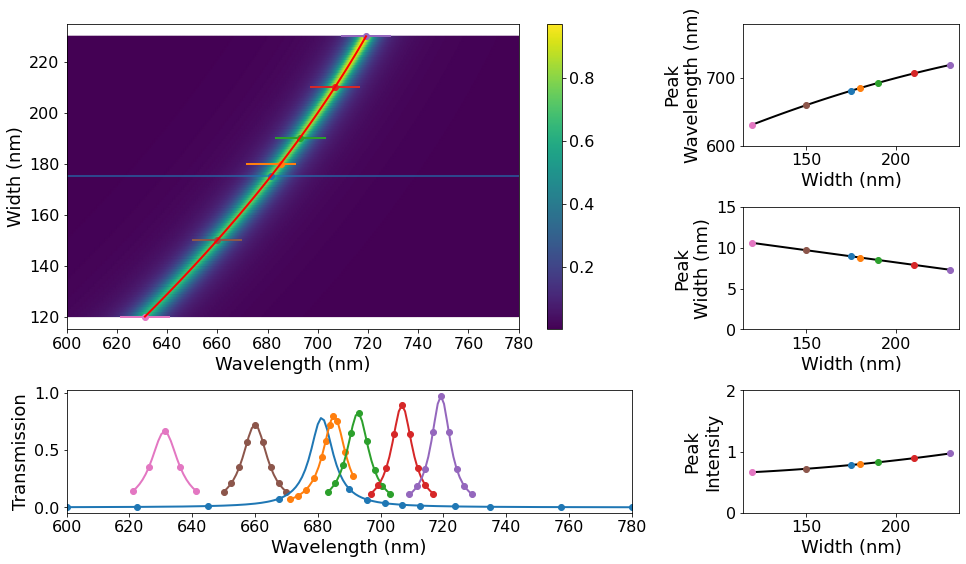

In [488]:

def interpolate_resonance_parameters(function, width_range, wvl_range, height):
    colors = matplotlib.cm.tab10(range(10))
    initial_width = (width_range[1]+width_range[0])*0.5
    wvl_step = 1.
    wvls = np.arange(wvl_range[0], wvl_range[1]+wvl_step, wvl_step)
    #peak_pos = peak_pos_function(initial_width)
    #print("target position: {}".format(peak_pos))
    fig = plt.figure(figsize=(16, 9))
    gs = gridspec.GridSpec(3, 3, figure=fig, wspace=0.5, hspace=0.5, width_ratios=[1.1, 1., 1.])    
    
    ax0 = fig.add_subplot(gs[:2, :2])
    ax1 = fig.add_subplot(gs[2, :2])
    ax2 = fig.add_subplot(gs[0, 2])
    ax3 = fig.add_subplot(gs[1, 2])
    ax4 = fig.add_subplot(gs[2, 2])
    
    plt.sca(ax0)
    width_step = 1.
    widths = np.arange(width_range[0], width_range[1]+width_step, width_step)
    X, Y = np.meshgrid(wavelengths, widths)
    Z = function(X, Y, height)
    plt.pcolormesh(X,Y,Z, shading='gouraud')
    plt.colorbar()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Width (nm)")
    plt.xlim(wvl_range)
    plt.ylim([width_range[0]-5, width_range[1]+5])
    adaptive, params = find_resonance_wavelength(initial_width, 600, 780, height)
    
    plt.sca(ax1)
    x, y = adaptive.get_grid()
    total_grid_size = x.size
    fit = lorentzian(wvls, params[0], params[1], params[2])
    plt.plot(wvls, fit, color=colors[0])
    
    evaluated_widths = [initial_width]
    evaluated_wvls = [params[0]]
    evaluated_fwhms = [params[1]]
    evaluated_peaks = [lorentzian_peak_val(params[1], params[2])]
    
    plt.scatter(x, y, color=colors[0])
    plt.xlim(wvl_range)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Transmission")
    
    plt.sca(ax0)
    plt.scatter(res_wvl, initial_width, label='Resonance 0', color=colors[0])
    plt.axhline(initial_width, alpha=0.6, color=colors[0])
    
    plt.sca(ax2)
    plt.scatter(initial_width, res_wvl, color=colors[0])
    plt.xlim([width_range[0]-5, width_range[1]+5])
    #plt.xlim(width_range)
    plt.ylim(wvl_range)
    plt.xlabel("Width (nm)")
    plt.ylabel("Peak\nWavelength (nm)")
    
    plt.sca(ax3)
    plt.scatter(initial_width, params[1], color=colors[0])
    #plt.xlim(width_range)
    plt.xlim([width_range[0]-5, width_range[1]+5])
    #plt.ylim(wvl_range)
    plt.xlabel("Width (nm)")
    plt.ylabel("Peak\nWidth (nm)")
    plt.ylim([0, 15.])
    
    plt.sca(ax4)
    plt.scatter(initial_width, lorentzian_peak_val(params[1], params[2]), color=colors[0])    
    #plt.xlim(width_range)
    plt.xlim([width_range[0]-5, width_range[1]+5])
    #plt.ylim(wvl_range)
    plt.xlabel("Width (nm)")
    plt.ylabel("Peak\nIntensity")
    plt.ylim([0, 2.])
    
    wvl_zoom_width = 20
    width_step_distance = 5
    current_res_wavelength = res_wvl
    direction = 1.
    current_width = initial_width + direction*width_step_distance
    peak_pos_model = PolynomialModel(evaluated_widths, evaluated_wvls)
    peak_fwhm_model = PolynomialModel(evaluated_widths, evaluated_fwhms)
    peak_intensity_model = PolynomialModel(evaluated_widths, evaluated_peaks)
    
    #plt.savefig(os.path.join("figures", "2D_sampling2_{}.png".format(0)),
    #               dpi=300, bbox_inches='tight')
    
    wvl_peak_guess = res_wvl    
    stop_after_next = False
    for step in range(8):
        print(step)
        wvl_min = wvl_peak_guess-wvl_zoom_width*0.5
        wvl_max = wvl_peak_guess+wvl_zoom_width*0.5
        adaptive, params = find_resonance_wavelength(current_width, wvl_min, wvl_max, height)

        plt.sca(ax1)
        x, y = adaptive.get_grid()
        total_grid_size += x.size
        reduced_wvls = np.arange(wvl_min, wvl_max+wvl_step, wvl_step)
        fit = lorentzian(reduced_wvls, params[0], params[1], params[2])
        plt.plot(reduced_wvls, fit, color=colors[step+1])
        plt.scatter(x, y, color=colors[step+1])
        plt.sca(ax0)
        plt.scatter(params[0], current_width, color=colors[step+1])
        #print(current_width, wvl_min, wvl_max)
        plt.hlines(current_width, wvl_min, wvl_max, color=colors[step+1])
            
        evaluated_widths.append(current_width)
        evaluated_wvls.append(params[0])
        evaluated_fwhms.append(params[1])
        evaluated_peaks.append(lorentzian_peak_val(params[1], params[2]))
        
        peak_pos_model.update_data(evaluated_widths, evaluated_wvls)
        peak_fwhm_model.update_data(evaluated_widths, evaluated_fwhms)
        peak_intensity_model.update_data(evaluated_widths, evaluated_peaks)
        if step > 0:
            peak_pos_model.order = 2
            peak_fwhm_model.order = 2
            peak_intensity_model.order =2
        
        #print(peak_pos_model.x, peak_pos_model.y)
        peak_pos_model.fit_params()
        #print(peak_fwhm_model.x, peak_fwhm_model.y)
        peak_fwhm_model.fit_params()
        peak_intensity_model.fit_params()
        
        #peak_pos_model.x = evaluated_widths
        #peak_pos_model.y = evaluated_wvls
        
        plt.sca(ax2)
        plt.scatter(current_width, params[0], color=colors[step+1])
        
        wvl_fit = peak_pos_model.evaluate(widths)
        if step == 0:
            model_plot_handle1 = plt.plot(widths, wvl_fit, color='k', zorder=-1)[0]
        else:
            model_plot_handle1.set_ydata(wvl_fit)
        plt.sca(ax0)
        if step == 0:
            model_plot_handle2 = plt.plot(wvl_fit, widths, color='r')[0]
        else:
            model_plot_handle2.set_xdata(wvl_fit)
            
        plt.sca(ax3)
        plt.scatter(current_width, params[1], color=colors[step+1])
        
        fwhm_fit = peak_fwhm_model.evaluate(widths)
        if step == 0:
            model_plot_handle3 = plt.plot(widths, fwhm_fit, color='k', zorder=-1)[0]
        else:
            model_plot_handle3.set_ydata(fwhm_fit)
        
        
        plt.sca(ax4)
        plt.scatter(current_width, lorentzian_peak_val(params[1], params[2]), color=colors[step+1])
        
        peak_fit = peak_intensity_model.evaluate(widths)
        if step == 0:
            model_plot_handle4 = plt.plot(widths, peak_fit, color='k', zorder=-1)[0]
        else:
            model_plot_handle4.set_ydata(peak_fit)
            
            
        width_step_distance *= 2
        if direction >0:
            current_width = np.min([current_width+direction*width_step_distance, width_range[1]])
        else:
            current_width = np.max([current_width+direction*width_step_distance, width_range[0]])
        wvl_peak_guess = peak_pos_model.evaluate(np.array([current_width]))[0]
        
        #plt.savefig(os.path.join("figures", "2D_sampling2_{}.png".format(step+1)),
        #           dpi=300, bbox_inches='tight')
        
        if stop_after_next:
            print("total grid size: {}".format(total_grid_size))
            return peak_pos_model, peak_fwhm_model, peak_intensity_model 
        if np.isclose(current_width, width_range[1]):
            width_step_dsitance = 10
            direction = -1
        elif np.isclose(current_width, width_range[0]):
            stop_after_next = True
        

width_range = [120, 230]
wvl_range = [600, 780]
height = 250.
models = interpolate_resonance_parameters(test_function, width_range, wvl_range, height)

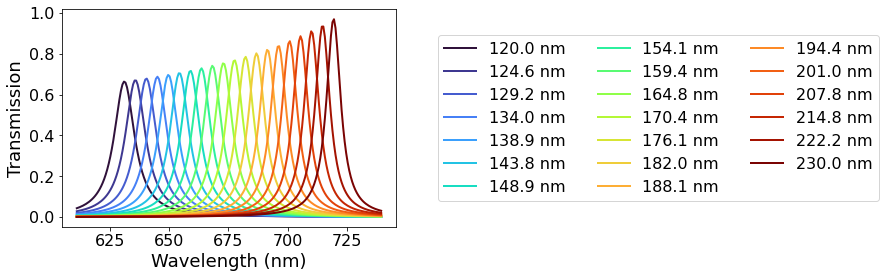

In [485]:
widths = np.arange(120, 231, 1)
peak_positions = models[0].evaluate(widths)
#peak_widths = models[1].evaluate(widths)
#peak_intensities = models[2].evaluate(widths)
min_wvl = peak_positions[0]
max_wvl = peak_positions[-1]

interp0 = scipy.interpolate.interp1d(peak_positions, widths)
#interp1 = scipy.interpolate.interp1d(peak_widths, widths)
#interp2 = scipy.interpolate.interp1d(peak_intensities, widths)

equally_spaced_resonances = np.linspace(min_wvl, max_wvl, 20)
fine_wavelengths = np.linspace(min_wvl-20, max_wvl+20, 201)

optimal_widths = interp0(equally_spaced_resonances)
optimal_peak_widths = models[1].evaluate(optimal_widths)
optimal_peak_intensities = models[2].evaluate(optimal_widths)
colors = matplotlib.cm.turbo(np.linspace(0., 1., 20))
for ii in range(20):
    width = optimal_widths[ii]
    peak_pos = equally_spaced_resonances[ii]
    peak_fwhm = optimal_peak_widths[ii]
    peak_intensity = optimal_peak_intensities[ii]
    
    fit = lorentzian(fine_wavelengths, peak_pos, peak_fwhm, lorentzian_a_factor(peak_fwhm, peak_intensity))
    plt.plot(fine_wavelengths, fit, label="{:.1f} nm".format(width), color=colors[ii])
plt.legend(bbox_to_anchor=[1.1, 0.5], loc='center left', ncol=3, fontsize=16.)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")
plt.savefig(os.path.join("figures", "evaluated_transsmision_resonances.png"), dpi=300,
           bbox_inches='tight')


In [490]:
np.sqrt(64)

8.0

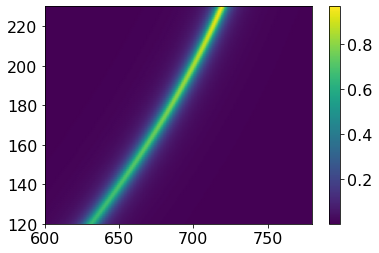

In [498]:
sliced_test_function = lambda x, y: test_function(x, y, 250.)

widths = np.arange(120, 231, 1)
wavelengths = np.arange(600, 781, 1)
X, Y = np.meshgrid(wavelengths, widths)
Z = sliced_test_function(X, Y)
plt.pcolormesh(X, Y, Z, shading='gouraud')
plt.colorbar()


In [523]:
from jcmwave.optimizer import create_study

study_domain = []
study_domain.append({'name':'wavelength','domain':(600, 780)})
study_domain.append({'name':'width','domain':(120, 230)})

constraints = []

def objective_function(wavelength, width):
    observation = study.new_observation()
    observation.add(sliced_test_function(wavelength, width))
    return observation

study = create_study(domain=study_domain,
                     constraints=constraints,
                     name="test_study3",
                    study_id="test_study3",
                     driver="GaussianProcessRegression",
                    dashboard=True, open_browser=True)

study.set_parameters(max_iter=650, num_parallel=1, min_UC=1e-3)
study.set_objective(objective_function)
study.run()

Polling server at http://localhost:4556
Optimization server is running
The dashboard is accessible via http://localhost:4556/dashboard/test_study3
2022-11-02 10:21:13: Computing 1-th evaluation.
2022-11-02 10:21:13: Calculated sample [667.205, 123.869] in 0.002423 s.
2022-11-02 10:21:13: Objective value 0.0174204 at [667.205, 123.869] acquired in 0.0004661 s
2022-11-02 10:21:13: Computing 2-th evaluation.
2022-11-02 10:21:13: Calculated sample [766.939, 217.097] in 0.04428 s.
2022-11-02 10:21:14: Objective value 0.00437817 at [766.939, 217.097] acquired in 0.0002136 s
2022-11-02 10:21:14: Computing 3-th evaluation.
2022-11-02 10:21:14: Calculated sample [767.354, 221.787] in 0.6023 s.
2022-11-02 10:21:14: Objective value 0.00471929 at [767.354, 221.787] acquired in 0.0002072 s
2022-11-02 10:21:14: Computing 4-th evaluation.
2022-11-02 10:21:14: Calculated sample [600.968, 220.883] in 0.5964 s.
2022-11-02 10:21:15: Current likelihood derivatives [-0.0155332, -0.0569638]
2022-11-02 10:21

2022-11-02 10:21:22: Objective value 0.00760532 at [680.782, 120.389] acquired in 0.0004852 s
2022-11-02 10:21:22: Computing 24-th evaluation.
2022-11-02 10:21:22: Calculated sample [642.692, 147.985] in 0.2446 s.
2022-11-02 10:21:23: Objective value 0.064812 at [642.692, 147.985] acquired in 0.0001254 s
2022-11-02 10:21:23: Computing 25-th evaluation.
2022-11-02 10:21:23: Calculated sample [780, 126.048] in 0.3387 s.
2022-11-02 10:21:23: Current likelihood derivatives [0.00171941, -0.00754307]
2022-11-02 10:21:23: Objective value 0.000897056 at [780, 126.048] acquired in 0.000128 s
2022-11-02 10:21:23: Computing 26-th evaluation.
2022-11-02 10:21:23: Calculated sample [672.407, 211.935] in 0.3187 s.
2022-11-02 10:21:24: Current likelihood derivatives [0.00221277, -0.00712439]
2022-11-02 10:21:24: Objective value 0.010744 at [672.407, 211.935] acquired in 0.0001848 s
2022-11-02 10:21:24: Computing 27-th evaluation.
2022-11-02 10:21:24: Calculated sample [630.381, 150.198] in 0.4828 s.


2022-11-02 10:21:34: Objective value 0.0232212 at [604.142, 120.727] acquired in 0.0002661 s
2022-11-02 10:21:34: Computing 47-th evaluation.
2022-11-02 10:21:34: Calculated sample [716.069, 182.338] in 0.3208 s.
2022-11-02 10:21:35: Objective value 0.0177217 at [716.069, 182.338] acquired in 0.0003116 s
2022-11-02 10:21:35: Computing 48-th evaluation.
2022-11-02 10:21:35: Calculated sample [679.863, 148.862] in 0.5114 s.
2022-11-02 10:21:35: Current likelihood derivatives [-0.00594053, -0.00260861]
2022-11-02 10:21:35: Objective value 0.0370384 at [679.863, 148.862] acquired in 0.0006969 s
2022-11-02 10:21:35: Computing 49-th evaluation.
2022-11-02 10:21:35: Calculated sample [765.99, 138.983] in 0.3789 s.
2022-11-02 10:21:35: Current likelihood derivatives [-0.00708406, -0.00196699]
2022-11-02 10:21:35: Objective value 0.0013004 at [765.99, 138.983] acquired in 0.0001967 s
2022-11-02 10:21:36: Computing 50-th evaluation.
2022-11-02 10:21:36: Calculated sample [656.277, 169.365] in 0.

2022-11-02 10:21:45: Current likelihood derivatives [-0.0161833, -0.0174844]
2022-11-02 10:21:45: Objective value 0.0633268 at [704.649, 186.007] acquired in 0.0001752 s
2022-11-02 10:21:45: Computing 71-th evaluation.
2022-11-02 10:21:45: Calculated sample [748.609, 230] in 0.5367 s.
2022-11-02 10:21:46: Current likelihood derivatives [-0.0167971, -0.0166963]
2022-11-02 10:21:46: Objective value 0.0147503 at [748.609, 230] acquired in 0.0003526 s
2022-11-02 10:21:46: Computing 72-th evaluation.
2022-11-02 10:21:46: Calculated sample [609.579, 181.322] in 0.4088 s.
2022-11-02 10:21:46: Current likelihood derivatives [-0.0156869, -0.0144481]
2022-11-02 10:21:46: Objective value 0.00260433 at [609.579, 181.322] acquired in 0.0004802 s
2022-11-02 10:21:46: Computing 73-th evaluation.
2022-11-02 10:21:46: Calculated sample [686.548, 167.08] in 0.5459 s.
2022-11-02 10:21:47: Current likelihood derivatives [-0.019438, -0.0201973]
2022-11-02 10:21:47: Objective value 0.100901 at [686.548, 167

2022-11-02 10:21:58: Current likelihood derivatives [0.00475993, 0.018403]
2022-11-02 10:21:58: Objective value 0.00751919 at [661.578, 206.799] acquired in 0.0001075 s
2022-11-02 10:21:58: Computing 95-th evaluation.
2022-11-02 10:21:59: Calculated sample [649.292, 230] in 0.3965 s.
2022-11-02 10:21:59: Current likelihood derivatives [0.00611884, 0.0184292]
2022-11-02 10:21:59: Objective value 0.00264341 at [649.292, 230] acquired in 0.0003135 s
2022-11-02 10:21:59: Computing 96-th evaluation.
2022-11-02 10:21:59: Calculated sample [610.243, 136.607] in 0.4947 s.
2022-11-02 10:21:59: Current likelihood derivatives [0.00745987, 0.0187226]
2022-11-02 10:21:59: Objective value 0.0124678 at [610.243, 136.607] acquired in 0.0002027 s
2022-11-02 10:22:00: Computing 97-th evaluation.
2022-11-02 10:22:00: Calculated sample [780, 177.97] in 0.3691 s.
2022-11-02 10:22:00: Current likelihood derivatives [0.00834299, 0.0186424]
2022-11-02 10:22:00: Objective value 0.00166693 at [780, 177.97] acqu

2022-11-02 10:22:11: Current likelihood derivatives [-0.00768255, -0.0219161]
2022-11-02 10:22:11: Objective value 0.274867 at [675.448, 160.589] acquired in 0.0002031 s
2022-11-02 10:22:11: Computing 119-th evaluation.
2022-11-02 10:22:11: Calculated sample [686.583, 137.612] in 0.3255 s.
2022-11-02 10:22:12: Current likelihood derivatives [-0.00777558, -0.0205221]
2022-11-02 10:22:12: Objective value 0.0119882 at [686.583, 137.612] acquired in 0.0001287 s
2022-11-02 10:22:12: Computing 120-th evaluation.
2022-11-02 10:22:12: Calculated sample [700.185, 217.769] in 0.3022 s.
2022-11-02 10:22:12: Current likelihood derivatives [-0.0513804, -0.0305702]
2022-11-02 10:22:12: Optimizing kernel hyperparameters.
2022-11-02 10:22:12: Optimized hyperparameters [7.22826, 11.3216] calculated in 0.09794 s. Gradient [-0.0314121, 0.0231111]
2022-11-02 10:22:12: Objective value 0.0904388 at [700.185, 217.769] acquired in 0.0001822 s
2022-11-02 10:22:12: Computing 121-th evaluation.
2022-11-02 10:22:

2022-11-02 10:22:23: Objective value 0.00606287 at [647.207, 194.7] acquired in 0.0002036 s
2022-11-02 10:22:24: Computing 142-th evaluation.
2022-11-02 10:22:24: Calculated sample [780, 166.833] in 0.3227 s.
2022-11-02 10:22:24: Objective value 0.00144544 at [780, 166.833] acquired in 0.0004599 s
2022-11-02 10:22:24: Computing 143-th evaluation.
2022-11-02 10:22:24: Calculated sample [709.607, 130.794] in 0.647 s.
2022-11-02 10:22:25: Current likelihood derivatives [0.000881817, 0.00339287]
2022-11-02 10:22:25: Objective value 0.00391875 at [709.607, 130.794] acquired in 0.0005574 s
2022-11-02 10:22:25: Computing 144-th evaluation.
2022-11-02 10:22:25: Calculated sample [675.51, 201.887] in 0.4524 s.
2022-11-02 10:22:25: Current likelihood derivatives [-0.000442804, 0.00301261]
2022-11-02 10:22:25: Objective value 0.0209873 at [675.51, 201.887] acquired in 0.0005608 s
2022-11-02 10:22:25: Computing 145-th evaluation.
2022-11-02 10:22:25: Calculated sample [695.697, 175.852] in 0.4287 

2022-11-02 10:22:37: Current likelihood derivatives [-0.0209405, -0.00115331]
2022-11-02 10:22:37: Objective value 0.00323858 at [648.412, 219.338] acquired in 0.0002155 s
2022-11-02 10:22:37: Computing 166-th evaluation.
2022-11-02 10:22:37: Calculated sample [746.809, 199.695] in 0.33 s.
2022-11-02 10:22:38: Current likelihood derivatives [-0.0206043, 3.80217e-05]
2022-11-02 10:22:38: Objective value 0.00647697 at [746.809, 199.695] acquired in 0.0002017 s
2022-11-02 10:22:38: Computing 167-th evaluation.
2022-11-02 10:22:38: Calculated sample [610.382, 171.779] in 0.4465 s.
2022-11-02 10:22:38: Current likelihood derivatives [-0.0201156, 0.00145205]
2022-11-02 10:22:38: Objective value 0.00338318 at [610.382, 171.779] acquired in 0.000212 s
2022-11-02 10:22:39: Computing 168-th evaluation.
2022-11-02 10:22:39: Calculated sample [735.783, 230] in 0.461 s.
2022-11-02 10:22:39: Current likelihood derivatives [-0.0203835, 0.00202185]
2022-11-02 10:22:39: Objective value 0.044931 at [735

2022-11-02 10:22:52: Current likelihood derivatives [0.00754705, 0.00441537]
2022-11-02 10:22:52: Objective value 0.00138367 at [747.129, 120] acquired in 0.0001712 s
2022-11-02 10:22:52: Computing 190-th evaluation.
2022-11-02 10:22:52: Calculated sample [780, 134.077] in 0.5177 s.
2022-11-02 10:22:53: Current likelihood derivatives [0.00747694, 0.00605138]
2022-11-02 10:22:53: Objective value 0.000980114 at [780, 134.077] acquired in 0.0002074 s
2022-11-02 10:22:53: Computing 191-th evaluation.
2022-11-02 10:22:53: Calculated sample [649.537, 143.136] in 0.6085 s.
2022-11-02 10:22:54: Current likelihood derivatives [0.00522394, 0.00825397]
2022-11-02 10:22:54: Objective value 0.412162 at [649.537, 143.136] acquired in 0.0005915 s
2022-11-02 10:22:54: Computing 192-th evaluation.
2022-11-02 10:22:54: Calculated sample [657.323, 215.112] in 0.4348 s.
2022-11-02 10:22:55: Current likelihood derivatives [0.00589585, 0.00920078]
2022-11-02 10:22:55: Objective value 0.00487887 at [657.323,

2022-11-02 10:23:10: Current likelihood derivatives [-0.0117404, 0.026802]
2022-11-02 10:23:10: Objective value 0.0173899 at [687.544, 146.135] acquired in 0.0002503 s
2022-11-02 10:23:10: Computing 214-th evaluation.
2022-11-02 10:23:10: Calculated sample [759.336, 139.691] in 0.5049 s.
2022-11-02 10:23:10: Current likelihood derivatives [-0.0103289, 0.0270454]
2022-11-02 10:23:10: Objective value 0.00147763 at [759.336, 139.691] acquired in 0.0005493 s
2022-11-02 10:23:10: Computing 215-th evaluation.
2022-11-02 10:23:10: Calculated sample [772.995, 172.252] in 0.514 s.
2022-11-02 10:23:11: Current likelihood derivatives [-0.0100969, 0.0280281]
2022-11-02 10:23:11: Objective value 0.00178714 at [772.995, 172.252] acquired in 0.0002308 s
2022-11-02 10:23:11: Computing 216-th evaluation.
2022-11-02 10:23:11: Calculated sample [725.273, 222.019] in 0.4751 s.
2022-11-02 10:23:12: Current likelihood derivatives [-0.018089, 0.0349821]
2022-11-02 10:23:12: Objective value 0.101449 at [725.2

2022-11-02 10:23:26: Current likelihood derivatives [0.00950811, 0.00667317]
2022-11-02 10:23:26: Objective value 0.00210501 at [600, 180.292] acquired in 0.000263 s
2022-11-02 10:23:26: Computing 238-th evaluation.
2022-11-02 10:23:26: Calculated sample [716.099, 213.332] in 0.3512 s.
2022-11-02 10:23:26: Current likelihood derivatives [-0.0344267, -0.0175556]
2022-11-02 10:23:26: Objective value 0.208714 at [716.099, 213.332] acquired in 0.000675 s
2022-11-02 10:23:26: Computing 239-th evaluation.
2022-11-02 10:23:26: Calculated sample [703.701, 209.768] in 0.4399 s.
2022-11-02 10:23:27: Current likelihood derivatives [-0.0317849, -0.0178507]
2022-11-02 10:23:27: Objective value 0.57331 at [703.701, 209.768] acquired in 0.0001874 s
2022-11-02 10:23:27: Computing 240-th evaluation.
2022-11-02 10:23:27: Calculated sample [622.022, 182.638] in 0.3695 s.
2022-11-02 10:23:27: Optimizing kernel hyperparameters.
2022-11-02 10:23:28: Optimized hyperparameters [7.88095, 10.0343] calculated in

2022-11-02 10:23:42: Objective value 0.0028312 at [641.983, 216.759] acquired in 0.0002453 s
2022-11-02 10:23:42: Computing 262-th evaluation.
2022-11-02 10:23:42: Calculated sample [740.369, 198.096] in 0.504 s.
2022-11-02 10:23:43: Objective value 0.00825966 at [740.369, 198.096] acquired in 0.000145 s
2022-11-02 10:23:43: Computing 263-th evaluation.
2022-11-02 10:23:43: Calculated sample [604.322, 199.416] in 0.4946 s.
2022-11-02 10:23:43: Current likelihood derivatives [-0.00487316, 0.00119073]
2022-11-02 10:23:43: Objective value 0.00158854 at [604.322, 199.416] acquired in 0.0005522 s
2022-11-02 10:23:43: Computing 264-th evaluation.
2022-11-02 10:23:43: Calculated sample [764.02, 198.806] in 0.326 s.
2022-11-02 10:23:44: Current likelihood derivatives [-0.00409723, 0.00149837]
2022-11-02 10:23:44: Objective value 0.00342704 at [764.02, 198.806] acquired in 0.000392 s
2022-11-02 10:23:44: Computing 265-th evaluation.
2022-11-02 10:23:44: Calculated sample [632.785, 166.792] in 0

2022-11-02 10:24:00: Current likelihood derivatives [0.00598448, -0.00904398]
2022-11-02 10:24:00: Objective value 0.0329296 at [629.783, 141.547] acquired in 0.0005987 s
2022-11-02 10:24:00: Computing 286-th evaluation.
2022-11-02 10:24:00: Calculated sample [631.896, 208.069] in 0.6772 s.
2022-11-02 10:24:01: Current likelihood derivatives [0.00641105, -0.00832882]
2022-11-02 10:24:01: Objective value 0.00257877 at [631.896, 208.069] acquired in 0.000155 s
2022-11-02 10:24:01: Computing 287-th evaluation.
2022-11-02 10:24:01: Calculated sample [704.56, 163.566] in 0.8047 s.
2022-11-02 10:24:02: Current likelihood derivatives [0.00713496, -0.00821231]
2022-11-02 10:24:02: Objective value 0.0148919 at [704.56, 163.566] acquired in 0.0004215 s
2022-11-02 10:24:02: Computing 288-th evaluation.
2022-11-02 10:24:02: Calculated sample [774.595, 157.768] in 0.7407 s.
2022-11-02 10:24:02: Current likelihood derivatives [0.00779216, -0.00797023]
2022-11-02 10:24:02: Objective value 0.00142491 

2022-11-02 10:24:19: Objective value 0.00421385 at [629.633, 185.485] acquired in 0.000181 s
2022-11-02 10:24:19: Computing 311-th evaluation.
2022-11-02 10:24:19: Calculated sample [659.317, 150.747] in 0.7866 s.
2022-11-02 10:24:20: Objective value 0.670952 at [659.317, 150.747] acquired in 0.000186 s
2022-11-02 10:24:20: Computing 312-th evaluation.
2022-11-02 10:24:20: Calculated sample [646.398, 126.693] in 1.017 s.
2022-11-02 10:24:21: Objective value 0.185116 at [646.398, 126.693] acquired in 0.0005007 s
2022-11-02 10:24:21: Computing 313-th evaluation.
2022-11-02 10:24:21: Calculated sample [770.9, 230] in 0.6186 s.
2022-11-02 10:24:22: Objective value 0.00482228 at [770.9, 230] acquired in 0.0003121 s
2022-11-02 10:24:22: Computing 314-th evaluation.
2022-11-02 10:24:22: Calculated sample [775.222, 223.596] in 0.6808 s.
2022-11-02 10:24:22: Objective value 0.00369205 at [775.222, 223.596] acquired in 0.0002036 s
2022-11-02 10:24:23: Computing 315-th evaluation.
2022-11-02 10:2

2022-11-02 10:24:44: Objective value 0.187068 at [698.178, 186.646] acquired in 0.0004091 s
2022-11-02 10:24:44: Computing 343-th evaluation.
2022-11-02 10:24:44: Calculated sample [754.953, 170.732] in 0.7656 s.
2022-11-02 10:24:45: Objective value 0.00266046 at [754.953, 170.732] acquired in 0.000406 s
2022-11-02 10:24:45: Computing 344-th evaluation.
2022-11-02 10:24:45: Calculated sample [719.354, 120] in 0.6196 s.
2022-11-02 10:24:45: Objective value 0.00238934 at [719.354, 120] acquired in 0.0003939 s
2022-11-02 10:24:46: Computing 345-th evaluation.
2022-11-02 10:24:46: Calculated sample [645.114, 158.072] in 0.5461 s.
2022-11-02 10:24:46: Objective value 0.0326288 at [645.114, 158.072] acquired in 0.0001817 s
2022-11-02 10:24:46: Computing 346-th evaluation.
2022-11-02 10:24:46: Calculated sample [758.275, 213.47] in 0.4655 s.
2022-11-02 10:24:46: Objective value 0.00564464 at [758.275, 213.47] acquired in 0.000155 s
2022-11-02 10:24:47: Computing 347-th evaluation.
2022-11-02 

2022-11-02 10:25:09: Objective value 0.231087 at [664.938, 147.63] acquired in 0.0001853 s
2022-11-02 10:25:09: Computing 375-th evaluation.
2022-11-02 10:25:09: Calculated sample [605.382, 156.325] in 0.72 s.
2022-11-02 10:25:10: Objective value 0.00455938 at [605.382, 156.325] acquired in 0.0004783 s
2022-11-02 10:25:10: Computing 376-th evaluation.
2022-11-02 10:25:10: Calculated sample [758.446, 191.683] in 0.5499 s.
2022-11-02 10:25:11: Objective value 0.00355954 at [758.446, 191.683] acquired in 0.0005076 s
2022-11-02 10:25:11: Computing 377-th evaluation.
2022-11-02 10:25:11: Calculated sample [738.955, 134.116] in 0.6619 s.
2022-11-02 10:25:11: Objective value 0.00202396 at [738.955, 134.116] acquired in 0.0001915 s
2022-11-02 10:25:12: Computing 378-th evaluation.
2022-11-02 10:25:12: Calculated sample [703.557, 230] in 0.6567 s.
2022-11-02 10:25:13: Objective value 0.0502037 at [703.557, 230] acquired in 0.0003982 s
2022-11-02 10:25:13: Computing 379-th evaluation.
2022-11-02

2022-11-02 10:25:36: Objective value 0.00458632 at [698.604, 124.242] acquired in 0.0001242 s
2022-11-02 10:25:36: Computing 407-th evaluation.
2022-11-02 10:25:36: Calculated sample [612.506, 145.335] in 0.5129 s.
2022-11-02 10:25:37: Objective value 0.00909284 at [612.506, 145.335] acquired in 0.0002325 s
2022-11-02 10:25:37: Computing 408-th evaluation.
2022-11-02 10:25:38: Calculated sample [659.18, 175.084] in 0.8484 s.
2022-11-02 10:25:38: Objective value 0.0307175 at [659.18, 175.084] acquired in 0.0005081 s
2022-11-02 10:25:39: Computing 409-th evaluation.
2022-11-02 10:25:39: Calculated sample [775.928, 130.942] in 0.9138 s.
2022-11-02 10:25:39: Objective value 0.00100492 at [775.928, 130.942] acquired in 0.0007315 s
2022-11-02 10:25:39: Computing 410-th evaluation.
2022-11-02 10:25:39: Calculated sample [677.951, 210.212] in 0.5336 s.
2022-11-02 10:25:40: Objective value 0.0162555 at [677.951, 210.212] acquired in 0.0001676 s
2022-11-02 10:25:40: Computing 411-th evaluation.


2022-11-02 10:26:05: Objective value 0.00706096 at [725.327, 171.143] acquired in 0.0007665 s
2022-11-02 10:26:05: Computing 439-th evaluation.
2022-11-02 10:26:05: Calculated sample [676.113, 216.637] in 0.4354 s.
2022-11-02 10:26:06: Objective value 0.0109824 at [676.113, 216.637] acquired in 0.0003486 s
2022-11-02 10:26:06: Computing 440-th evaluation.
2022-11-02 10:26:06: Calculated sample [720.726, 203.241] in 0.6364 s.
2022-11-02 10:26:07: Objective value 0.039837 at [720.726, 203.241] acquired in 0.0002804 s
2022-11-02 10:26:07: Computing 441-th evaluation.
2022-11-02 10:26:07: Calculated sample [637.913, 135.564] in 0.883 s.
2022-11-02 10:26:08: Objective value 0.175922 at [637.913, 135.564] acquired in 0.0001447 s
2022-11-02 10:26:08: Computing 442-th evaluation.
2022-11-02 10:26:08: Calculated sample [630.45, 215.688] in 0.8623 s.
2022-11-02 10:26:09: Objective value 0.00212514 at [630.45, 215.688] acquired in 0.0002666 s
2022-11-02 10:26:09: Computing 443-th evaluation.
2022

2022-11-02 10:26:34: Objective value 0.0329179 at [659.727, 125.468] acquired in 0.0003545 s
2022-11-02 10:26:34: Computing 470-th evaluation.
2022-11-02 10:26:34: Calculated sample [646.243, 212.943] in 0.8458 s.
2022-11-02 10:26:35: Objective value 0.00351603 at [646.243, 212.943] acquired in 0.0002558 s
2022-11-02 10:26:35: Computing 471-th evaluation.
2022-11-02 10:26:35: Calculated sample [701.953, 135.661] in 0.7352 s.
2022-11-02 10:26:36: Objective value 0.00576498 at [701.953, 135.661] acquired in 0.0005255 s
2022-11-02 10:26:36: Computing 472-th evaluation.
2022-11-02 10:26:36: Calculated sample [620.065, 136.464] in 0.5167 s.
2022-11-02 10:26:37: Objective value 0.0228412 at [620.065, 136.464] acquired in 0.0001698 s
2022-11-02 10:26:37: Computing 473-th evaluation.
2022-11-02 10:26:37: Calculated sample [748.694, 169.077] in 0.791 s.
2022-11-02 10:26:38: Objective value 0.0030484 at [748.694, 169.077] acquired in 0.000217 s
2022-11-02 10:26:38: Computing 474-th evaluation.
2

2022-11-02 10:27:05: Objective value 0.014683 at [651.847, 178.504] acquired in 0.0002198 s
2022-11-02 10:27:05: Computing 502-th evaluation.
2022-11-02 10:27:05: Calculated sample [636.529, 230] in 1.048 s.
2022-11-02 10:27:06: Objective value 0.00189168 at [636.529, 230] acquired in 0.0002341 s
2022-11-02 10:27:06: Computing 503-th evaluation.
2022-11-02 10:27:06: Calculated sample [641.017, 155.7] in 0.8872 s.
2022-11-02 10:27:07: Objective value 0.027749 at [641.017, 155.7] acquired in 0.0001855 s
2022-11-02 10:27:07: Computing 504-th evaluation.
2022-11-02 10:27:07: Calculated sample [758.205, 152.629] in 0.7915 s.
2022-11-02 10:27:08: Objective value 0.00182823 at [758.205, 152.629] acquired in 0.0001707 s
2022-11-02 10:27:08: Computing 505-th evaluation.
2022-11-02 10:27:08: Calculated sample [670.521, 139.936] in 0.8795 s.
2022-11-02 10:27:08: Objective value 0.042093 at [670.521, 139.936] acquired in 0.0002151 s
2022-11-02 10:27:09: Computing 506-th evaluation.
2022-11-02 10:2

2022-11-02 10:27:37: Objective value 0.0135164 at [681.791, 134.794] acquired in 0.0005853 s
2022-11-02 10:27:37: Computing 534-th evaluation.
2022-11-02 10:27:37: Calculated sample [776.043, 211.482] in 0.6701 s.
2022-11-02 10:27:38: Objective value 0.00296216 at [776.043, 211.482] acquired in 0.0002284 s
2022-11-02 10:27:38: Computing 535-th evaluation.
2022-11-02 10:27:39: Calculated sample [727.159, 210.378] in 1.194 s.
2022-11-02 10:27:39: Objective value 0.0331111 at [727.159, 210.378] acquired in 0.0002925 s
2022-11-02 10:27:40: Computing 536-th evaluation.
2022-11-02 10:27:40: Calculated sample [622.398, 188.361] in 0.9116 s.
2022-11-02 10:27:40: Objective value 0.00312105 at [622.398, 188.361] acquired in 0.0001771 s
2022-11-02 10:27:40: Computing 537-th evaluation.
2022-11-02 10:27:40: Calculated sample [644.117, 164.695] in 0.5859 s.
2022-11-02 10:27:41: Objective value 0.0192044 at [644.117, 164.695] acquired in 0.000566 s
2022-11-02 10:27:41: Computing 538-th evaluation.
2

2022-11-02 10:28:09: Computing 565-th evaluation.
2022-11-02 10:28:09: Calculated sample [600, 135.959] in 0.945 s.
2022-11-02 10:28:10: Objective value 0.00794967 at [600, 135.959] acquired in 0.000212 s
2022-11-02 10:28:10: Computing 566-th evaluation.
2022-11-02 10:28:10: Calculated sample [624.492, 219.017] in 0.6955 s.
2022-11-02 10:28:11: Objective value 0.00173423 at [624.492, 219.017] acquired in 0.000423 s
2022-11-02 10:28:11: Computing 567-th evaluation.
2022-11-02 10:28:11: Calculated sample [724.689, 150.582] in 1.066 s.
2022-11-02 10:28:12: Objective value 0.00409321 at [724.689, 150.582] acquired in 0.0001583 s
2022-11-02 10:28:12: Computing 568-th evaluation.
2022-11-02 10:28:12: Calculated sample [753.458, 181.849] in 0.7921 s.
2022-11-02 10:28:13: Objective value 0.00341711 at [753.458, 181.849] acquired in 0.0001478 s
2022-11-02 10:28:13: Computing 569-th evaluation.
2022-11-02 10:28:13: Calculated sample [720.368, 163.756] in 0.6597 s.
2022-11-02 10:28:14: Objective 

2022-11-02 10:28:43: Computing 596-th evaluation.
2022-11-02 10:28:43: Calculated sample [608.607, 197.363] in 1.006 s.
2022-11-02 10:28:43: Objective value 0.00181076 at [608.607, 197.363] acquired in 0.0005696 s
2022-11-02 10:28:43: Computing 597-th evaluation.
2022-11-02 10:28:43: Calculated sample [661.5, 137.553] in 0.7634 s.
2022-11-02 10:28:45: Objective value 0.090676 at [661.5, 137.553] acquired in 0.0001986 s
2022-11-02 10:28:45: Computing 598-th evaluation.
2022-11-02 10:28:45: Calculated sample [633.108, 124.366] in 1.159 s.
2022-11-02 10:28:46: Objective value 0.545774 at [633.108, 124.366] acquired in 0.0004654 s
2022-11-02 10:28:46: Computing 599-th evaluation.
2022-11-02 10:28:46: Calculated sample [758.779, 181.471] in 0.964 s.
2022-11-02 10:28:47: Objective value 0.00291354 at [758.779, 181.471] acquired in 0.0004942 s
2022-11-02 10:28:47: Computing 600-th evaluation.
2022-11-02 10:28:48: Calculated sample [676.803, 132.015] in 1.178 s.
2022-11-02 10:28:48: Objective 

2022-11-02 10:29:22: Objective value 0.00105242 at [780, 140.369] acquired in 0.0001659 s
2022-11-02 10:29:22: Computing 628-th evaluation.
2022-11-02 10:29:22: Calculated sample [647.373, 206.392] in 1.289 s.
2022-11-02 10:29:23: Objective value 0.00431577 at [647.373, 206.392] acquired in 0.0004659 s
2022-11-02 10:29:23: Computing 629-th evaluation.
2022-11-02 10:29:23: Calculated sample [688.348, 124.928] in 1.078 s.
2022-11-02 10:29:24: Objective value 0.00667702 at [688.348, 124.928] acquired in 0.0002372 s
2022-11-02 10:29:24: Computing 630-th evaluation.
2022-11-02 10:29:25: Calculated sample [713.284, 217.619] in 1.134 s.
2022-11-02 10:29:26: Objective value 0.788717 at [713.284, 217.619] acquired in 0.0003967 s
2022-11-02 10:29:26: Computing 631-th evaluation.
2022-11-02 10:29:26: Calculated sample [674.816, 148.843] in 1.024 s.
2022-11-02 10:29:27: Objective value 0.0619169 at [674.816, 148.843] acquired in 0.0004451 s
2022-11-02 10:29:27: Computing 632-th evaluation.
2022-11

In [524]:
samples = []
flat_x = X.flatten()
flat_y = Y.flatten()
for ix in range(X.size):
    samples.append([int(flat_x[ix]), int(flat_y[ix])])
print(samples[0])
predictions = study.predict(samples)

[600, 120]
2022-11-02 10:29:51: Maximum number of observations reached.


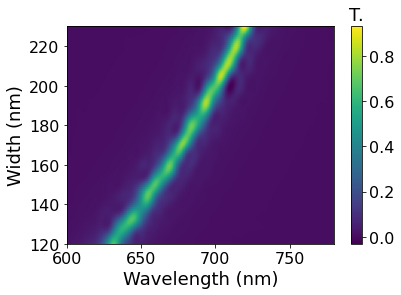

In [525]:
means = np.array(predictions['means']).reshape(X.shape)

plt.pcolormesh(X,Y,means, shading='gouraud')
cb = plt.colorbar()
cb.ax.set_title("T.")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Width (nm)")
plt.savefig(os.path.join("figures","gaussian_process_regression_650.png"), dpi=300, bbox_inches='tight')